##### Download, normalize and split vol cube data into train/test datasets

In [1]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

from src.data.vol.get_vol_cube_tenors_strikes_dates import get_vol_cube_tenors_strikes_dates
data, uniq_opt_tenors, uniq_swap_tenors, uniq_strikes, dates = get_vol_cube_tenors_strikes_dates()

# Normalize data
from src.data.vol.normalizer import Normalizer
normalizer = Normalizer()
data_norm = normalizer.normalize(data)

# Split train and test datasets
seed = 0
from src.utils.get_train_test_datasets import get_train_test_datasets
data_norm_train, dates_train, data_norm_test, dates_test = get_train_test_datasets(data_norm,
                                                                                   dates,
                                                                                    seed=seed,
                                                                                    train_ratio=0.8)

data_train = normalizer.denormalize(data_norm_train)
data_test = normalizer.denormalize(data_norm_test)

##### Create and train the model (uncomment to run it - it takes 10 minutes to train)

* The model has latent space dimension = 2.

* Beta is a weight of Kullback-Leibler (KL) loss when we calculate total loss as a sum of KL loss and reconstruction loss.

In [2]:
# EPOCHS = 3000
# BATCH_SIZE = 16
# HIDDEN_LAYERS_NODES =  [400, 200, 200, 100]
# LOSS_TYPE = 'mse'  # or 'bce'
# BETA = 1

# # Create the name of the model based on characteristics
# NAME = 'vol_cube_vae_van_2latd_' 
# for i, nodes in enumerate(HIDDEN_LAYERS_NODES):
#     NAME += str(nodes) + '_'
# NAME += str(EPOCHS) + 'ep_bat' + str(BATCH_SIZE) +'_' + str(BETA)
# NAME += '_seed' + str(seed)
# print(NAME)


# # Create VAE and fit it
# from src.models.vae_vanilla import VaeVanilla
# vae = VaeVanilla(input_shape=data_norm_train.shape[1:],
#                  hidden_layers_nodes=HIDDEN_LAYERS_NODES, # best [400, 200, 200, 100] or a bit worse [400, 200, 100, 50]
#                  latent_space_dim=2,
#                  loss_type=LOSS_TYPE,  
#                  beta=BETA)
# vae.compile(optimizer='adam')
# history = vae.fit(data_norm_train, 
#                   epochs=EPOCHS, 
#                   verbose=0,
#                   batch_size=BATCH_SIZE,
#                   validation_data=data_norm_test)  # add validation_data=data_norm_test worse results

# from src.utils.save_model_and_history import save_model_and_history
# save_model_and_history(vae, 
#                        history, 
#                        NAME,
#                        data_type='vol')

### Load the saved model and its history from the file

In [3]:
from src.utils.load_model_and_history import load_model_and_history

NAME = 'vol_cube_vae_van_2latd_400_200_200_100_3000ep_bat16_1_seed0'
vae, history = load_model_and_history(NAME,
                                      data_type='vol')

c:\Users\alexi\Documents\All\ETH_UZH\MasterThesis\_MT_Vol_cube\code_my\autoencoder_library\venv\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


##### Error histogram for test dataset

Mean error 10.97
Max error 176.13


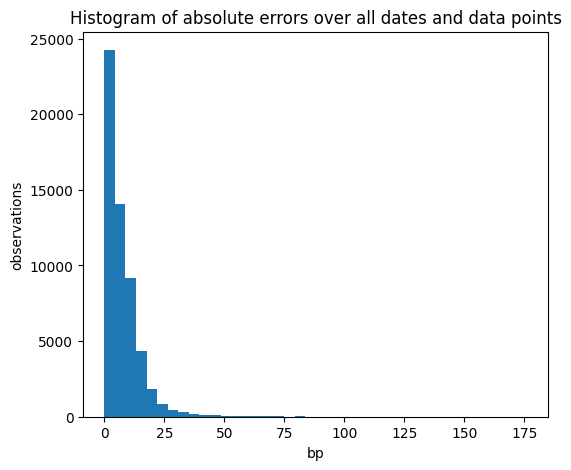

In [5]:
from src.visualization.vol.error_histograms import error_histograms

predictions = normalizer.denormalize(vae.predict(x=data_norm_test, verbose=0))
error_histograms(predictions,
                data_test,
                save_name=NAME)

##### Plot 2d latent space values

For each date, based on vol cube data, we calculate latent space values z0 and z1

It looks similar to the Gaussian distribution - that's why Kullback-Leibner loss is small

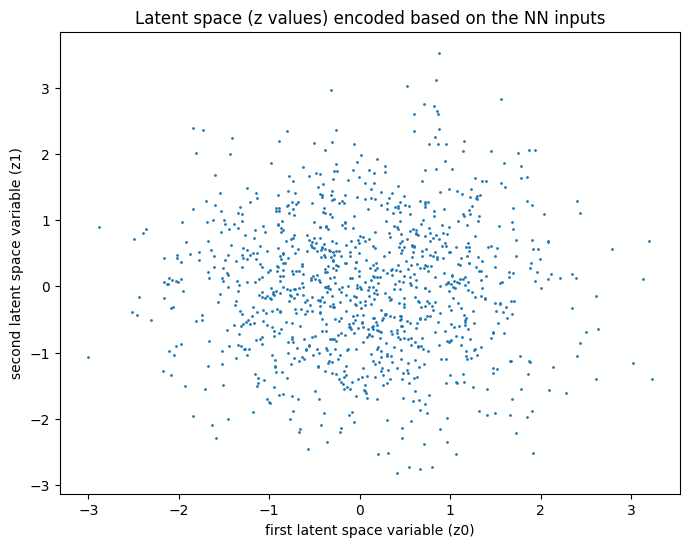

In [6]:
from src.visualization.plot_latent_space_2d_values import plot_latent_space_2d_values
plot_latent_space_2d_values(vae,
                            data_norm_train,
                            vae_latent_type='z',
                            data_type='vol',
                            save_name=NAME)